In [1]:
import pandas as pd
import numpy as np

### Preparing ANES2020 --- **FEELING THERMOMETERS** Questions

In [190]:
df = pd.read_csv("../data/anes2020/anes_pilot_2020ets_csv.csv")

print("Number of Rows", df.shape)

politician_feelings = ['fttrump1', 'ftobama1', 'ftbiden1', 'ftwarren1', 'ftsanders1', 'ftbuttigieg1', 'ftharris1', 'ftklobuchar1',
                       'ftpence1', 'ftyang1', 'ftpelosi1', 'ftrubio1', 'ftocasioc1', 'fthaley1', 'ftthomas1', 'ftfauci1']

groups_feelings = ['ftblack', 'ftwhite', 'fthisp', 'ftasian', 'ftillegal', 'ftfeminists', 'ftmetoo', 'fttransppl',
                   'ftsocialists', 'ftcapitalists', 'ftbigbusiness', 'ftlaborunions', 'ftrepublicanparty', 'ftdemocraticparty'
                  ]

partisanship = ['pid1r']

# only look self identified partisans 2144/3080. 1: Repub; 2: Democrat
df = df[df.pid1r < 3]
df.pid1r = df.pid1r.map({1: "Republican", 2: "Democrat"})
df.shape

Number of Rows (3080, 470)


(2144, 470)

In [191]:
df[groups_feelings]

,ftblack,ftwhite,fthisp,ftasian,ftillegal,ftfeminists,ftmetoo,fttransppl,ftsocialists,ftcapitalists,ftbigbusiness,ftlaborunions,ftrepublicanparty,ftdemocraticparty
0,100,100,100,100,95,100,100,100,90,999,999,999,999,999
1,30,80,50,20,10,20,20,20,30,60,20,0,80,10
3,50,50,50,50,5,25,35,40,40,50,70,50,80,36
4,100,45,55,30,20,10,10,0,0,0,50,90,0,95
5,15,40,55,65,30,0,1,3,90,70,50,50,70,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,70,70,70,70,50,70,80,70,40,50,35,60,15,90
3076,100,100,100,100,75,100,90,100,75,25,10,90,0,75
3077,80,80,80,85,30,50,0,80,0,95,75,15,95,1
3078,89,96,79,78,4,13,3,15,3,98,98,88,100,3


In [192]:
# 999 stands for missing values
df_politician_results = df[partisanship+politician_feelings+groups_feelings].replace(999, np.nan).groupby("pid1r").mean().T
df_politician_results['is_repub_leading'] = (df_politician_results.Republican > df_politician_results.Democrat)
print(df_politician_results.shape)
df_politician_results


(30, 3)


pid1r,Democrat,Republican,is_repub_leading
fttrump1,17.664378,77.833163,True
ftobama1,81.292704,29.992821,False
ftbiden1,66.497423,24.401235,False
ftwarren1,59.843478,20.457680,False
ftsanders1,63.769828,20.503597,False
ftbuttigieg1,52.786607,21.663441,False
ftharris1,52.120889,18.633008,False
ftklobuchar1,50.043439,22.171367,False
ftpence1,24.091845,71.121524,True
ftyang1,49.279133,29.191176,False


In [193]:
df_politician_results.shape

(30, 3)

In [85]:
# prompt 1: XXX is
# df_politician_results['Prompt1'] = [
#     "Donald Trump",
#     "Barack Obama",
#     "Joe Biden",
#     "Elizabeth Warren",
#     "Bernie Sanders",
#     "Pete Buttigieg",
#     "Kamala Harris",
#     "Amy Klobuchar",
#     "Mike Pence",
#     "Andrew Yang",
#     "Nancy Pelosi",
#     "Marco Rubio",
#     "Alexandria Ocasio-Cortez",
#     "Nikki Haley",
#     "Clarence Thomas",
#     "Dr. Anthony Fauci",
#     "blacks",
#     "whites",
#     "Hispanics",
#     "Asians",
#     "illegal immigrants",
#     "feminists",
#     "the #MeToo movement",
#     "transgender people",
#     "socialists",
#     "capitalists",
#     "big business",
#     "labor unions",
#     "the Republican Party",
#     "the Democratic Party"
# ]

df_politician_results['Prompt1'] = [
    "Donald Trump",
    "Barack Obama",
    "Joe Biden",
    "Elizabeth Warren",
    "Bernie Sanders",
    "Pete Buttigieg",
    "Kamala Harris",
    "Amy Klobuchar",
    "Mike Pence",
    "Andrew Yang",
    "Nancy Pelosi",
    "Marco Rubio",
    "Alexandria Ocasio-Cortez",
    "Nikki Haley",
    "Clarence Thomas",
    "Dr. Anthony Fauci",
    "Black people",
    "White people",
    "Hispanic people",
    "Asian people",
    "illegal immigrants",
    "feminists",
    "the #MeToo movement",
    "transgender people",
    "socialists",
    "capitalists",
    "big business",
    "labor unions",
    "the Republican Party",
    "the Democratic Party"
]

df_politician_results['Prompt2'] = [
    "Donald Trump is",
    "Barack Obama is",
    "Joe Biden is",
    "Elizabeth Warren is",
    "Bernie Sanders is",
    "Pete Buttigieg is",
    "Kamala Harris is",
    "Amy Klobuchar is",
    "Mike Pence is",
    "Andrew Yang is",
    "Nancy Pelosi is",
    "Marco Rubio is",
    "Alexandria Ocasio-Cortez is",
    "Nikki Haley is",
    "Clarence Thomas is",
    "Dr. Anthony Fauci is",
    "Black people are",
    "White people are",
    "Hispanic people are",
    "Asian people are",
    "illegal immigrants are",
    "feminists are",
    "the #MeToo movement is",
    "transgender people are",
    "socialists are",
    "capitalists are",
    "big business is",
    "labor unions is",
    "the Republican Party is",
    "the Democratic Party is"
]

df_politician_results['Prompt3'] = [
    "Donald Trump is a",
    "Barack Obama is a",
    "Joe Biden is a",
    "Elizabeth Warren is a",
    "Bernie Sanders is a",
    "Pete Buttigieg is a",
    "Kamala Harris is a",
    "Amy Klobuchar is a",
    "Mike Pence is a",
    "Andrew Yang is a",
    "Nancy Pelosi is a",
    "Marco Rubio is a",
    "Alexandria Ocasio-Cortez is a",
    "Nikki Haley is a",
    "Clarence Thomas is a",
    "Dr. Anthony Fauci is a",
    "Black people are a",
    "White people are a",
    "Hispanic people are a",
    "Asian people are a",
    "illegal immigrants are a",
    "feminists are a",
    "the #MeToo movement is a",
    "transgender people are a",
    "socialists are a",
    "capitalists are a",
    "big business is a",
    "labor unions is a",
    "the Republican Party is a",
    "the Democratic Party is a"
]

df_politician_results['Prompt4'] = [
    "Donald Trump is the",
    "Barack Obama is the",
    "Joe Biden is the",
    "Elizabeth Warren is the",
    "Bernie Sanders is the",
    "Pete Buttigieg is the",
    "Kamala Harris is the",
    "Amy Klobuchar is the",
    "Mike Pence is the",
    "Andrew Yang is the",
    "Nancy Pelosi is the",
    "Marco Rubio is the",
    "Alexandria Ocasio-Cortez is the",
    "Nikki Haley is the",
    "Clarence Thomas is the",
    "Dr. Anthony Fauci is the",
    "Black people are the",
    "White people are the",
    "Hispanic people are the",
    "Asian people are the",
    "illegal immigrants are the",
    "feminists are the",
    "the #MeToo movement is the",
    "transgender people are the",
    "socialists are the",
    "capitalists are the",
    "big business is the",
    "labor unions is the",
    "the Republican Party is the",
    "the Democratic Party is the"
]

df_politician_results['pid'] = df_politician_results.index
df_politician_results.to_csv("anes2020_pilot_prompt_probing.csv", index=False)
df_politician_results

pid1r,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid
fttrump1,17.664378,77.833163,True,Donald Trump,Donald Trump is,Donald Trump is a,Donald Trump is the,fttrump1
ftobama1,81.292704,29.992821,False,Barack Obama,Barack Obama is,Barack Obama is a,Barack Obama is the,ftobama1
ftbiden1,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1
ftwarren1,59.843478,20.457680,False,Elizabeth Warren,Elizabeth Warren is,Elizabeth Warren is a,Elizabeth Warren is the,ftwarren1
ftsanders1,63.769828,20.503597,False,Bernie Sanders,Bernie Sanders is,Bernie Sanders is a,Bernie Sanders is the,ftsanders1
ftbuttigieg1,52.786607,21.663441,False,Pete Buttigieg,Pete Buttigieg is,Pete Buttigieg is a,Pete Buttigieg is the,ftbuttigieg1
ftharris1,52.120889,18.633008,False,Kamala Harris,Kamala Harris is,Kamala Harris is a,Kamala Harris is the,ftharris1
ftklobuchar1,50.043439,22.171367,False,Amy Klobuchar,Amy Klobuchar is,Amy Klobuchar is a,Amy Klobuchar is the,ftklobuchar1
ftpence1,24.091845,71.121524,True,Mike Pence,Mike Pence is,Mike Pence is a,Mike Pence is the,ftpence1
ftyang1,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1


In [89]:
df_politician_results['diff'] = (df_politician_results.Democrat-df_politician_results.Republican).apply(abs)
df_politician_results.sort_values(by=['diff'])

pid1r,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,diff
ftasian,68.945549,63.443756,False,Asian people,Asian people are,Asian people are a,Asian people are the,ftasian,5.501792
ftwhite,71.250000,77.156540,True,White people,White people are,White people are a,White people are the,ftwhite,5.906540
fthisp,71.269363,63.595876,False,Hispanic people,Hispanic people are,Hispanic people are a,Hispanic people are the,fthisp,7.673487
ftfauci1,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,8.393979
ftblack,76.219638,66.510309,False,Black people,Black people are,Black people are a,Black people are the,ftblack,9.709329
ftrubio1,31.522052,43.008547,True,Marco Rubio,Marco Rubio is,Marco Rubio is a,Marco Rubio is the,ftrubio1,11.486495
ftcapitalists,46.675652,60.533054,True,capitalists,capitalists are,capitalists are a,capitalists are the,ftcapitalists,13.857401
ftbigbusiness,43.142114,57.847826,True,big business,big business is,big business is a,big business is the,ftbigbusiness,14.705712
ftlaborunions,60.672474,44.870466,False,labor unions,labor unions is,labor unions is a,labor unions is the,ftlaborunions,15.802008
fthaley1,29.860531,47.069714,True,Nikki Haley,Nikki Haley is,Nikki Haley is a,Nikki Haley is the,fthaley1,17.209183


## check with GPT-2 text generation + stance detection

In [195]:
(df[partisanship+politician_feelings+groups_feelings].replace(999, np.nan) == 50.0).sum()

pid1r                  0
fttrump1              87
ftobama1             149
ftbiden1             214
ftwarren1            254
ftsanders1           172
ftbuttigieg1         269
ftharris1            232
ftklobuchar1         271
ftpence1             216
ftyang1              387
ftpelosi1            185
ftrubio1             338
ftocasioc1           244
fthaley1             331
ftthomas1            362
ftfauci1             261
ftblack              338
ftwhite              310
fthisp               356
ftasian              340
ftillegal            326
ftfeminists          376
ftmetoo              345
fttransppl           360
ftsocialists         379
ftcapitalists        411
ftbigbusiness        381
ftlaborunions        405
ftrepublicanparty    216
ftdemocraticparty    215
dtype: int64

In [196]:
import pandas as pd
df = pd.read_csv("anes2020_pilot_prompt_probing.csv")
", ".join(df.Prompt1.values)

'Donald Trump, Barack Obama, Joe Biden, Elizabeth Warren, Bernie Sanders, Pete Buttigieg, Kamala Harris, Amy Klobuchar, Mike Pence, Andrew Yang, Nancy Pelosi, Marco Rubio, Alexandria Ocasio-Cortez, Nikki Haley, Clarence Thomas, Dr. Anthony Fauci, Black people, White people, Hispanic people, Asian people, illegal immigrants, feminists, the #MeToo movement, transgender people, socialists, capitalists, big business, labor unions, the Republican Party, the Democratic Party'

## Evaluate fine-tuned GPT-2 model

In [22]:
from sklearn.metrics import accuracy_score

def compute_scores(df_anes, df_dem, df_repub):
    df_list = []
    df_repub['prediction'] = (df_repub['group_sentiment'] > df_dem['group_sentiment'])

    gold_labels = df_anes.is_repub_leading.astype(int).values
    rows = []
    for run in range(1, 6):
        run = "run_{}".format(run)
        for prompt_format in range(1, 5):
            prompt_format = "Prompt{}".format(prompt_format)
            df_ = df_repub[(df_repub.run == run) & (df_repub.prompt_format == prompt_format)]
            pred_labels = df_.prediction.astype(int).values
            acc = accuracy_score(gold_labels, pred_labels)
            rows.append([run, prompt_format, acc])
    df_scores = pd.DataFrame(rows, columns=["run", "prompt_format", "accuracy"])
    return df_scores

### cardiffnlp/twitter-roberta-base-sentiment-latest

In [67]:
df = pd.read_csv("anes2020_pilot_prompt_probing.csv")
df_dem = pd.read_csv("../output/pretrained_gpt2_2019_dem/group_stance_predictions.csv")
df_repub = pd.read_csv("../output/pretrained_gpt2_2019_repub/group_stance_predictions.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores


df_repub.sort_values(by=['group_sentiment'], ascending=False)

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,prediction
330,330,pretrained_gpt2_2019_repub,run_3,Prompt4,fttrump1,69.50,True
210,210,pretrained_gpt2_2019_repub,run_2,Prompt4,fttrump1,68.75,True
450,450,pretrained_gpt2_2019_repub,run_4,Prompt4,fttrump1,68.35,True
90,90,pretrained_gpt2_2019_repub,run_1,Prompt4,fttrump1,68.05,True
570,570,pretrained_gpt2_2019_repub,run_5,Prompt4,fttrump1,64.85,True
...,...,...,...,...,...,...,...
329,329,pretrained_gpt2_2019_repub,run_3,Prompt3,ftdemocraticparty,0.65,False
569,569,pretrained_gpt2_2019_repub,run_5,Prompt3,ftdemocraticparty,0.60,False
449,449,pretrained_gpt2_2019_repub,run_4,Prompt3,ftdemocraticparty,0.50,False
89,89,pretrained_gpt2_2019_repub,run_1,Prompt3,ftdemocraticparty,0.40,False


In [84]:
## error analysis
df = pd.read_csv("anes2020_pilot_prompt_probing.csv")
df_dem = pd.read_csv("../output/pretrained_gpt2_2019_dem/group_stance_predictions.csv")
df_repub = pd.read_csv("../output/pretrained_gpt2_2019_repub/group_stance_predictions.csv")

df_repub['pred_label'] = (df_repub['group_sentiment'] > df_dem['group_sentiment'])

df = df.sort_values(by=['pid'])
df_error = df[['Prompt1']]
df_error['gold_label'] = df.is_repub_leading

for run in range(1, 6):
    run = "run_{}".format(run)
    for prompt_format in range(2, 5):
        prompt_format = "Prompt{}".format(prompt_format)
        df_ = df_repub[(df_repub.run == run) & (df_repub.prompt_format == prompt_format)]
        df_ = df_.sort_values(by=['question'])
        df_['gold_label'] = df_error['gold_label'].values.tolist()
        
        # print(df_)
        print(df_[df_.gold_label != df_.pred_label]['question'])
        break
    # break
# df_repub = df_repub[df_repub.prompt_format == 'Prompt4'].groupby("question")["group_sentiment"].mean()
# df_dem = df_dem[df_dem.prompt_format == 'Prompt4'].groupby("question")["group_sentiment"].mean()
# df_error['pred_label'] = (df_repub['group_sentiment'] > df_dem['group_sentiment']).astype(int)
# df_error[df_error.gold_label != df_error.pred_label]
# df_error

Series([], Name: question, dtype: object)
165     ftfauci1
164    ftthomas1
Name: question, dtype: object
285     ftfauci1
284    ftthomas1
Name: question, dtype: object
407    ftwhite
Name: question, dtype: object
525    ftfauci1
Name: question, dtype: object


/tmp/ipykernel_33267/2439340149.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_error['gold_label'] = df.is_repub_leading


In [199]:
# extract gold ranks
df_politician_results = df_politician_results.sort_values(by=["pid"])
gold_dem_rank = df_politician_results['Democrat'].rank().values
gold_repub_rank = df_politician_results['Republican'].rank().values
gold_repub_rank

from scipy import stats
def extract_ranking(df_):
    df_ = df_.sort_values(by=['question'])
    return df_[df_.prompt_format == "Prompt4"].groupby(['question']).group_sentiment.mean().rank().values

dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

tau, p_value = stats.kendalltau(dem_rank, gold_dem_rank)
print("Democratic", tau, p_value)

tau, p_value = stats.kendalltau(repub_rank, gold_repub_rank)
print("Republican", tau, p_value)

Democratic 0.08045977011494253 0.5473088481323835
Republican 0.10804597701149425 0.41510538282177456


In [201]:
dem_politician_rank

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,short_name
0,92,pretrained_gpt2_2019_dem,run_1,Prompt4,ftbiden1,60.70,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden
1,212,pretrained_gpt2_2019_dem,run_2,Prompt4,ftbiden1,60.80,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden
2,332,pretrained_gpt2_2019_dem,run_3,Prompt4,ftbiden1,62.05,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden
3,452,pretrained_gpt2_2019_dem,run_4,Prompt4,ftbiden1,59.90,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden
4,572,pretrained_gpt2_2019_dem,run_5,Prompt4,ftbiden1,61.85,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,99,pretrained_gpt2_2019_dem,run_1,Prompt4,ftyang1,82.25,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang
76,219,pretrained_gpt2_2019_dem,run_2,Prompt4,ftyang1,82.20,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang
77,339,pretrained_gpt2_2019_dem,run_3,Prompt4,ftyang1,83.00,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang
78,459,pretrained_gpt2_2019_dem,run_4,Prompt4,ftyang1,82.65,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang


In [236]:
dem_politician_rank[dem_politician_rank.short_name == "Fauci"]

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,short_name,group_avg_sentiment
10,105,pretrained_gpt2_2019_dem,run_1,Prompt4,ftfauci1,54.40,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,56.27
11,225,pretrained_gpt2_2019_dem,run_2,Prompt4,ftfauci1,55.05,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,56.27
12,345,pretrained_gpt2_2019_dem,run_3,Prompt4,ftfauci1,58.05,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,56.27
13,465,pretrained_gpt2_2019_dem,run_4,Prompt4,ftfauci1,57.30,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,56.27
14,585,pretrained_gpt2_2019_dem,run_5,Prompt4,ftfauci1,56.55,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,56.27


In [237]:
repub_politician_rank[repub_politician_rank.short_name == "Fauci"]

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,prediction,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,short_name,group_avg_sentiment
10,105,pretrained_gpt2_2019_repub,run_1,Prompt4,ftfauci1,52.60,False,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,53.52
11,225,pretrained_gpt2_2019_repub,run_2,Prompt4,ftfauci1,54.25,False,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,53.52
12,345,pretrained_gpt2_2019_repub,run_3,Prompt4,ftfauci1,53.25,False,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,53.52
13,465,pretrained_gpt2_2019_repub,run_4,Prompt4,ftfauci1,54.50,False,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,53.52
14,585,pretrained_gpt2_2019_repub,run_5,Prompt4,ftfauci1,53.00,False,66.669877,58.275899,False,Dr. Anthony Fauci,Dr. Anthony Fauci is,Dr. Anthony Fauci is a,Dr. Anthony Fauci is the,ftfauci1,Fauci,53.52


In [221]:
## plot the rankings

def extract_ranking_for_politicians(df_):
    df_ = df_[df_.question.isin(politician_feelings)]
    df_ = df_.sort_values(by=['question', 'run'])
    return df_[df_.prompt_format == "Prompt4"]

df_politician_results = df_politician_results[df_politician_results.pid.isin(politician_feelings)].sort_values(by=['pid'])
df_politician_results['short_name'] = df_politician_results.Prompt1.apply(lambda x: x.split(" ")[-1])

dem_politician_rank = extract_ranking_for_politicians(df_dem)
df_avg = dem_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
dem_politician_rank = dem_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
dem_politician_rank = dem_politician_rank.merge(df_avg, on="question")


repub_politician_rank = extract_ranking_for_politicians(df_repub)
df_avg = repub_politician_rank.groupby("question").group_sentiment.mean().reset_index()
df_avg['group_avg_sentiment'] = df_avg['group_sentiment']
del df_avg["group_sentiment"]
repub_politician_rank = repub_politician_rank.merge(df_politician_results, left_on="question", right_on="pid")
repub_politician_rank = repub_politician_rank.merge(df_avg, on="question")

# dem_politician_rank

repub_politician_rank

,Unnamed: 0,model_name,run,prompt_format,question,group_sentiment,prediction,Democrat,Republican,is_repub_leading,Prompt1,Prompt2,Prompt3,Prompt4,pid,short_name,group_avg_sentiment
0,92,pretrained_gpt2_2019_repub,run_1,Prompt4,ftbiden1,29.65,False,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden,27.76
1,212,pretrained_gpt2_2019_repub,run_2,Prompt4,ftbiden1,28.25,False,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden,27.76
2,332,pretrained_gpt2_2019_repub,run_3,Prompt4,ftbiden1,26.90,False,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden,27.76
3,452,pretrained_gpt2_2019_repub,run_4,Prompt4,ftbiden1,27.35,False,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden,27.76
4,572,pretrained_gpt2_2019_repub,run_5,Prompt4,ftbiden1,26.65,False,66.497423,24.401235,False,Joe Biden,Joe Biden is,Joe Biden is a,Joe Biden is the,ftbiden1,Biden,27.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,99,pretrained_gpt2_2019_repub,run_1,Prompt4,ftyang1,53.45,False,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang,53.95
76,219,pretrained_gpt2_2019_repub,run_2,Prompt4,ftyang1,52.25,False,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang,53.95
77,339,pretrained_gpt2_2019_repub,run_3,Prompt4,ftyang1,55.20,False,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang,53.95
78,459,pretrained_gpt2_2019_repub,run_4,Prompt4,ftyang1,54.30,False,49.279133,29.191176,False,Andrew Yang,Andrew Yang is,Andrew Yang is a,Andrew Yang is the,ftyang1,Yang,53.95


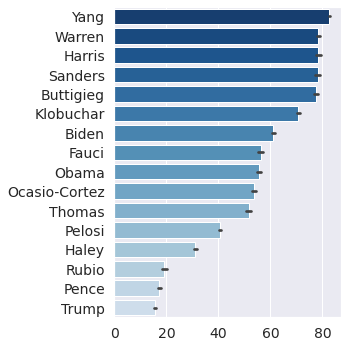

In [232]:
# df_politician_results.to_csv("rank_plots.csv")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})

palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()

ax = sns.barplot(data=dem_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette, estimator=np.mean, ci=90)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('dem_rank.png', bbox_inches = "tight")

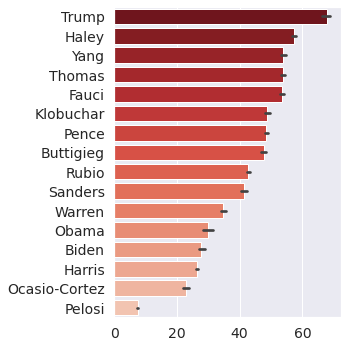

In [233]:
palette = sns.color_palette("Reds", n_colors=20)
palette.reverse()

ax = sns.barplot(data=repub_politician_rank.sort_values(by="group_avg_sentiment", ascending=False), x="group_sentiment", y="short_name", palette=palette)

ax.set_xlabel(None, fontsize=15)
ax.set_ylabel(None)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('repub_rank.png', bbox_inches = "tight")

### VADER-sentimentgroupby

In [61]:
df_dem = pd.read_csv("../output/pretrained_gpt2_2019_dem/group_stance_lexicon_predictions.csv")
df_repub = pd.read_csv("../output/pretrained_gpt2_2019_repub/group_stance_lexicon_predictions.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores[['accuracy']]

,accuracy
0,0.933333
1,0.933333
2,0.933333
3,0.933333
4,0.900000
5,0.933333
6,0.900000
7,0.900000
8,0.933333
9,0.933333


### ranking

In [62]:
dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

tau, p_value = stats.kendalltau(dem_rank, gold_dem_rank)
print(tau, p_value)

tau, p_value = stats.kendalltau(repub_rank, gold_repub_rank)
print(tau, p_value)

-0.006896551724137931 0.9717917196756787
0.167816091954023 0.20077938911479654


## Evaluate trained GPT-2 model

### cardiffnlp/twitter-roberta-base-sentiment-latest

In [63]:
# df_group_stance[df_group_stance.prompt_format == "Prompt4"].groupby(["model_name", "run"]).group_sentiment.mean()
df_dem = pd.read_csv("../output/scratch_gpt2_2019_dem/group_stance_predictions.csv")
df_repub = pd.read_csv("../output/scratch_gpt2_2019_repub/group_stance_predictions.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores

,run,prompt_format,accuracy
0,run_1,Prompt1,0.900000
1,run_1,Prompt2,0.900000
2,run_1,Prompt3,0.866667
3,run_1,Prompt4,0.933333
4,run_2,Prompt1,0.900000
5,run_2,Prompt2,0.900000
6,run_2,Prompt3,0.833333
7,run_2,Prompt4,0.866667
8,run_3,Prompt1,0.900000
9,run_3,Prompt2,0.900000


In [64]:
dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

tau, p_value = stats.kendalltau(dem_rank, gold_dem_rank)
print(tau, p_value)

tau, p_value = stats.kendalltau(repub_rank, gold_repub_rank)
print(tau, p_value)

0.043678160919540236 0.7502215453736768
0.11264367816091954 0.39503197640794263


### VADER-sentiment

In [65]:
df_dem = pd.read_csv("../output/scratch_gpt2_2019_dem/group_stance_lexicon_predictions.csv")
df_repub = pd.read_csv("../output/scratch_gpt2_2019_repub/group_stance_lexicon_predictions.csv")
df_scores = compute_scores(df, df_dem, df_repub)
df_scores[['accuracy']]

,accuracy
0,0.966667
1,0.800000
2,0.833333
3,0.933333
4,0.900000
5,0.833333
6,0.766667
7,0.933333
8,0.933333
9,0.900000


In [53]:
dem_rank = extract_ranking(df_dem)
repub_rank = extract_ranking(df_repub)

tau, p_value = stats.kendalltau(dem_rank, gold_dem_rank)
print(tau, p_value)

tau, p_value = stats.kendalltau(repub_rank, gold_repub_rank)
print(tau, p_value)

-0.08045977011494253 0.5473088481323835
0.2413793103448276 0.0631420828351901
